In [70]:
# Plots for Optics Letter
import matplotlib.pyplot as plt
plt.style.use('huntstone')
import numpy as np
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, "../../python")
from plotting import makefig
import eo_signal as eos
import currents as cp

In [2]:
# Some constants
y0 = 800e-9
tp = 30e-15
r0 = 1e-3
d  = 100e-6
psi = 15
ctype = "GaP"
method = "cross"

In [36]:
# Example of single shot signal
if False:
# Input current
    ind = 1
    I, ti, p2p, sig_a, t_sig_a, g, tg = eos.get_signal(ind, ctype, d, y0, tp, psi, 1.1e-3, method)
    I, ti, p2p, sig_b, t_sig_b, g, tg = eos.get_signal(ind, ctype, d, y0, tp, psi, 0.9e-3, method)
    fig = plt.figure(figsize = (8, 12), dpi = 200)
    ax1 = fig.add_subplot(211)
    ax1.tick_params(axis='y', colors='red')
    ax1.yaxis.label.set_color('red')
    ax1.set_ylabel('I [kA]')
    ax1.plot(ti*1e12, I, '-r')
    #ax1.set_xticks([])


    # EOS Signal
    ax2 = ax1.twinx()
    ax2.spines['right'].set_color('blue')
    ax2.spines['left'].set_color('red')
    ax2.tick_params(axis='y', colors='blue')
    ax2.yaxis.label.set_color('blue')

    ax2.set_ylabel('EOS Signal [AU]')
    ax2.plot(t_sig_a*1e12, sig_a / max(sig_b), '-b')
    ax2.plot(t_sig_b*1e12, sig_b / max(sig_b), ':b')

    # BPM signal
    ax3    = fig.add_subplot(212, sharex=ax1)
    diff   = sig_b - sig_a
    ax3.plot(t_sig_b*1e12, diff / max(diff), '-b')
    ax3.set_xlabel('t [ps]')
    ax3.set_ylabel("BPM Signal [AU]")
    plt.subplots_adjust(hspace = 0)
    plt.show()

In [37]:
len(t_sig_a)

1000

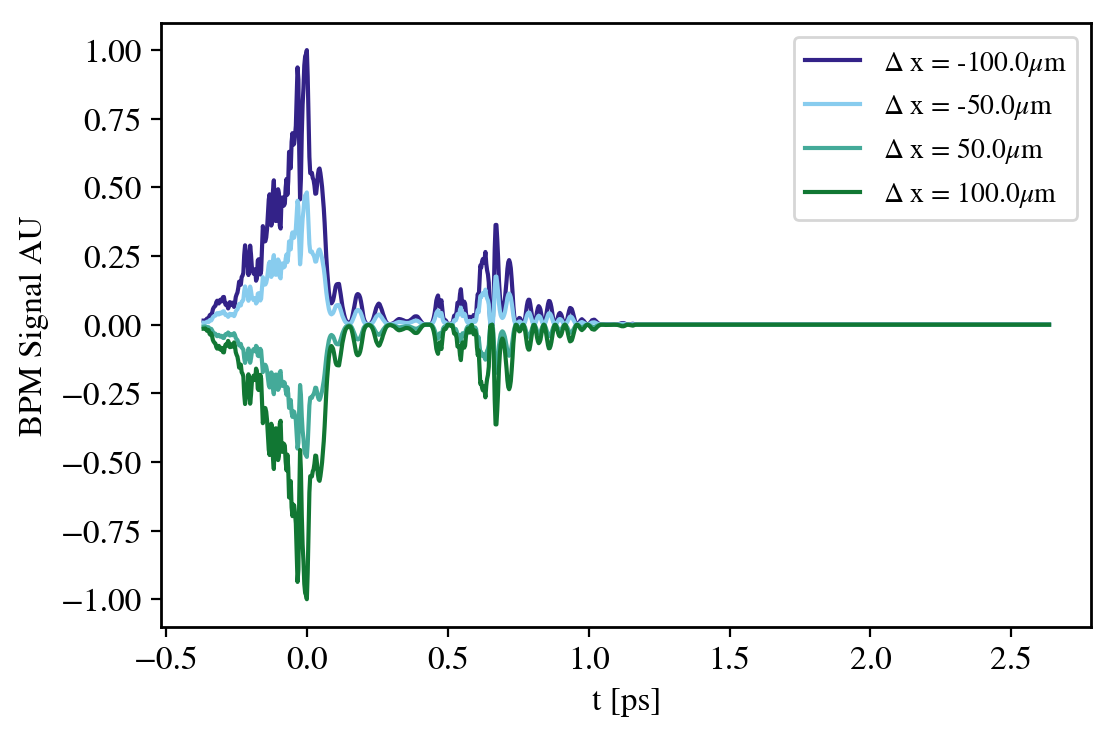

In [53]:
# Example of BPM signal scaling
# Genearate data 
r0 = 1e-3
dxp = np.array([-100, -50, 50, 100])*1e-6
dxs = np.linspace(-100, 100, 1000)*1e-6

# BPM signal
bpm_sig = np.zeros((len(dxp), 1000))
t_bpm   = np.zeros((len(dxp), 1000))
for i in range(len(dxp)):
    dm, dm, dm, sig, t_sig, dm, dm = eos.get_signal(ind, ctype, d, y0, tp, psi, r0+dxp[i], method)
    bpm_sig[i,:] = sig
    t_bpm[i,:] = t_sig*1e12

m100 = bpm_sig[0,:] - bpm_sig[3,:]
m50  = bpm_sig[1,:] - bpm_sig[2,:]
p50  = bpm_sig[2,:] - bpm_sig[1,:]
p100 = bpm_sig[3,:] - bpm_sig[0,:]
dsets = (m100, m50, p50, p100)
norm = np.amax(dsets)

d_peak = np.zeros(len(dxs))
w_peak = np.zeros(len(dxs))
for i in range(len(dxs)):
    dm, dm, dm, sig, dm, dm, dm = eos.get_signal(ind, ctype, d, y0, tp, psi, r0+dxs[i], method)
    d_peak[i] = max(sig)
    ind1      = np.argmax(sig)
    w_peak[i] = max(sig[(ind1+100):-1])

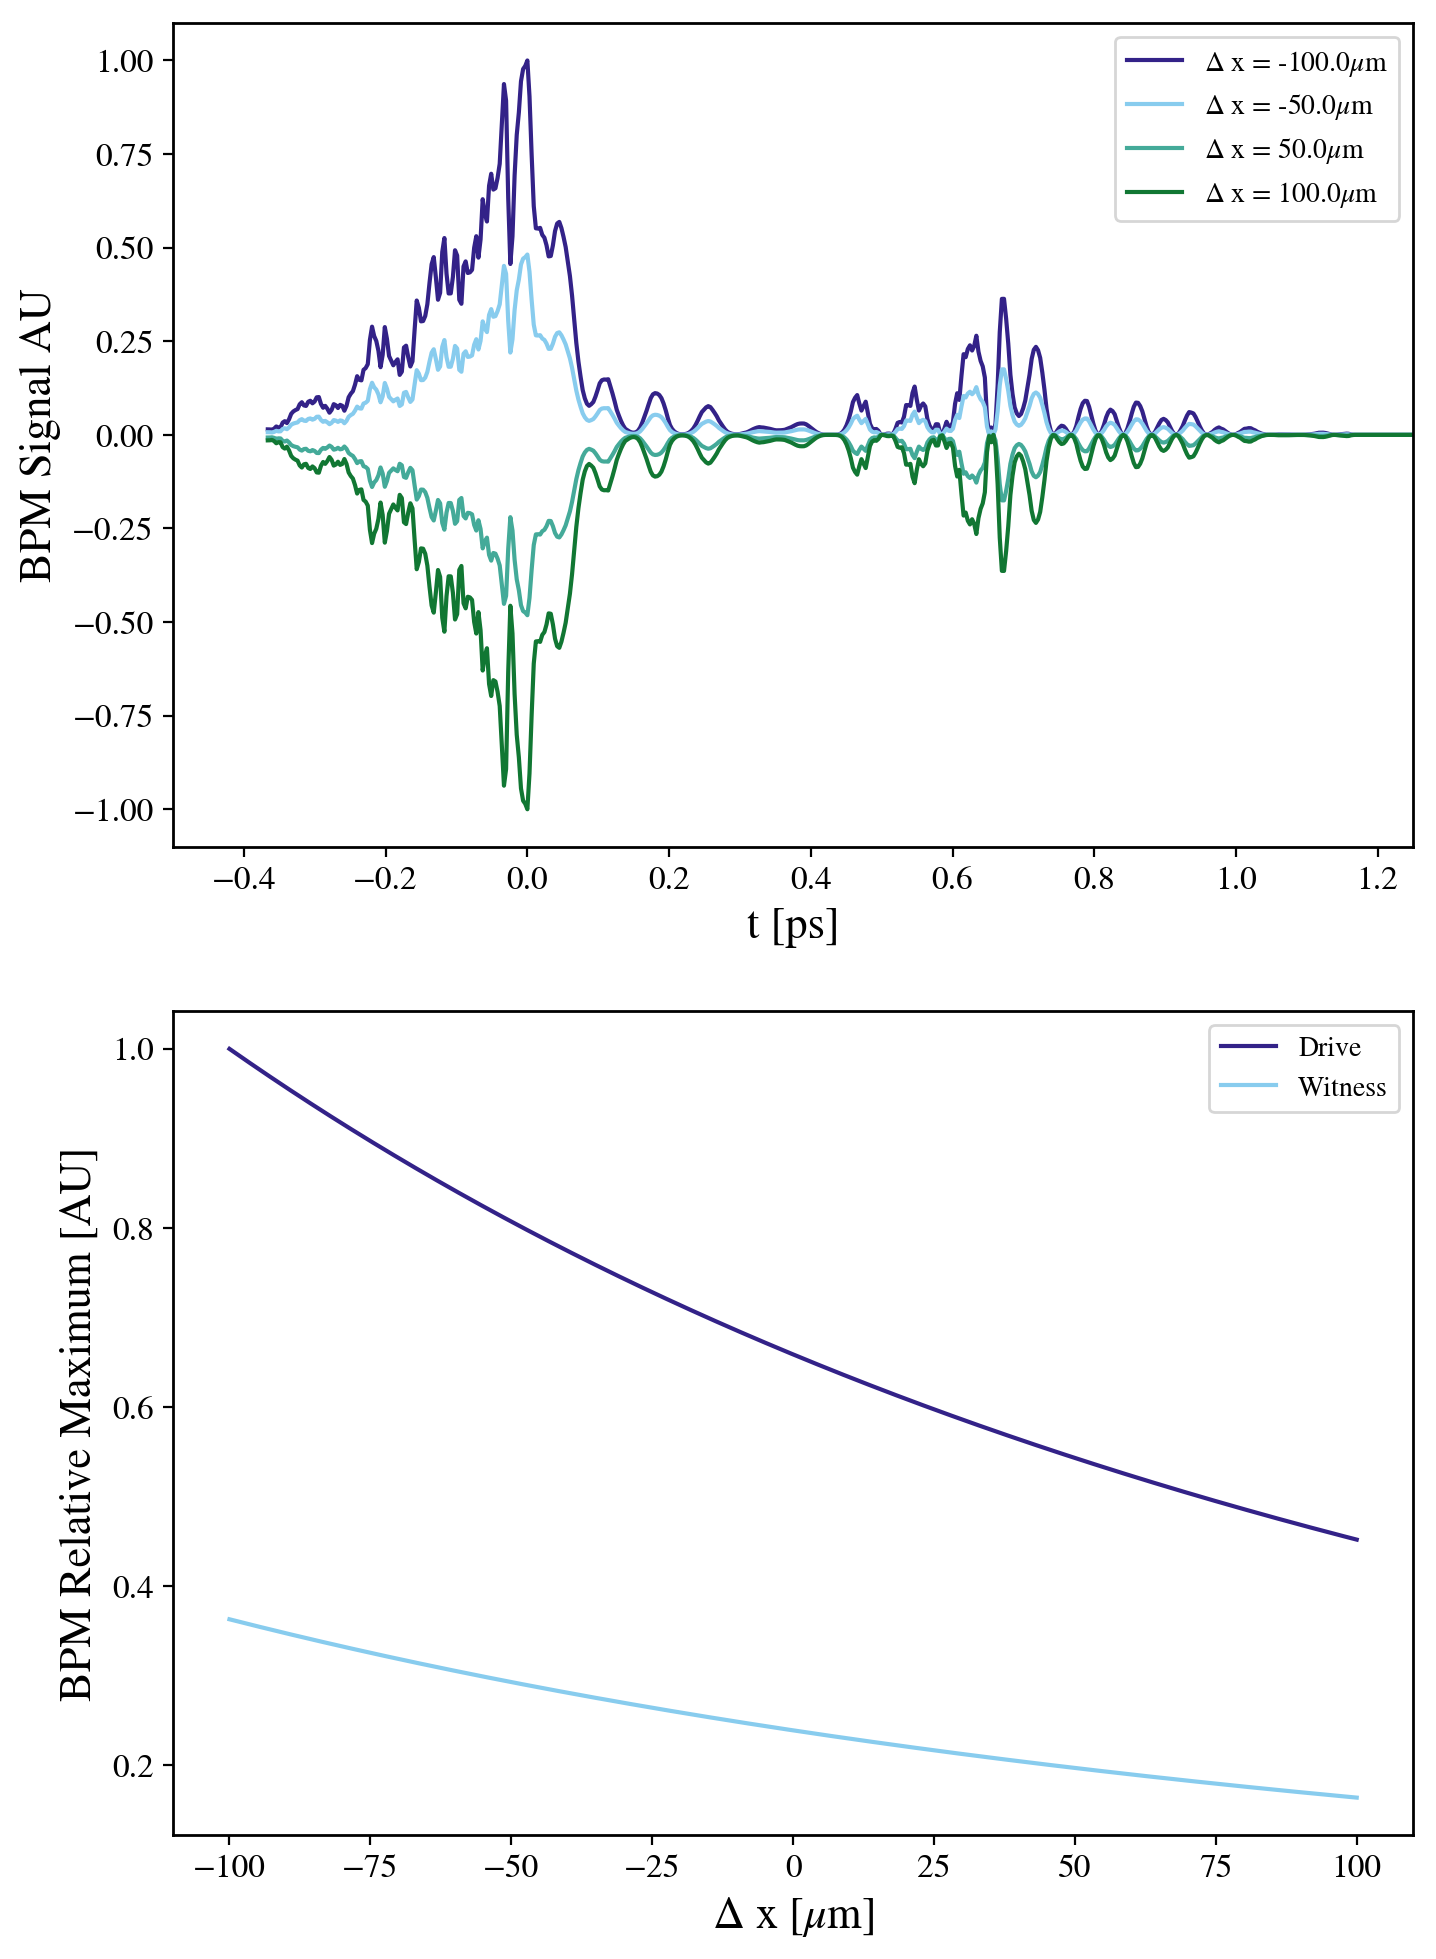

In [66]:
# Plot
fig = plt.figure(figsize = (8, 12), dpi = 200)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for i in range(len(dxp)):
    data = dsets[i]
    lab  = r'$\Delta$ x = ' + str(np.round(dxp[i]*1e6, 2)) + r'$\mu$m'
    ax1.plot(t_bpm[i,:], data / norm, label = lab)
ax1.set_xlabel('t [ps]')
ax1.set_ylabel('BPM Signal AU')
ax1.set_xlim([-0.5, 1.25])
ax1.legend()

ax2.plot(dxs*1e6, d_peak / max(d_peak), label = "Drive")
ax2.plot(dxs*1e6, w_peak / max(d_peak), label = "Witness")
ax2.set_xlabel(r'$\Delta$ x [$\mu$m]')
ax2.set_ylabel("BPM Relative Maximum [AU]")

ax2.legend()
plt.show()